# Confidence intervals

A 95% confidence interval is an interval around a sample mean with a width such that 

* if we drew many independent samples (all of size n) from the parent distribution
* ... and we drew an interval of that width around each sample mean
* ... then 95% of those intervals would contain the $\mu$, the true mean of the parent population

Another way of thinking about this is that for a single 95% confidence interval computed on a single sample, we (the researcher) have 95% confidence that that interval contains $\mu$, the true mean of the parent population

In this section we look at how we can construct confidence intervals.



### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 
warnings.simplefilter('ignore', category=FutureWarning)

### Example sample

Once again we use our sample of IQ scores for 60 students taking A-level maths (*note* - these are made up data!):

In [2]:
mathsIQ_60 = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/mathsIQ_60.csv')

Recall that:
* the sample mean is 104.6 and



In [3]:
m = mathsIQ_60.IQ.mean()
m

np.float64(104.6)

* the sample standard deviation is 11.4

In [4]:
s = mathsIQ_60.IQ.std()
s

np.float64(11.366319559953567)

## Likelihood of a reference value

Are A-level maths students smarter than average?

The mean IQ in the general population is 100. We can ask how probable the observed sample mean ($m=104.6$) would be if the sample of 60 maths students really came from a population with mean $\mu=100$ (or lower) and standard deviation estimated as $s$. This, conversely, gives us the likelihood that the true population mean was 100 or lower.


 
In our calculations we use the likelihood distribution that we calculated for the population mean $\mu$ based on our sample:

$$\mu \sim \mathcal{N}(m, \frac{s}{\sqrt{n}}) $$

in this case:

$$\mu \sim \mathcal{N}(104.6, \frac{11.4}{\sqrt{60}}) $$

Thinking about this visually we have the following...

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/sampling_pIQ100.png" width="80%"  />

Note that the likelihood that $\mu \leq 100$ is worked out from the likelihood distribution based on the sample (red curve).

I also show the true sampling distribution fo the mean for lots of samples from the parent population (grey histogram) for comparison - note that if we had used a different sample, with a different value of $m$<, we would get a different estimate of the probability that $\mu \leq 100$

### Calculation with `stats.norm.cdf()`

We can then work out the exact probability using `stats.norm.cdf()`:

In [5]:
n=60
SEM = s/(n**0.5)
# percentage of time sample mean is expected to be less than 100 = 
stats.norm.cdf(100,m,SEM)*100

np.float64(0.08597770891100479)

Apparently, the likelihood that the population mean IQ for A-level maths students is 100, is quite low: 0.085%


* **Note** that if we are asking whether maths students are smarter than average, we thinking about the probability of getting the sample mean we observed if maths students as a whole have an average IQ (100) *or below average IQ<100*
    * There is an analogy here with the Blindsight example in the previous session - we would conclude our patient was guessing if his performance was equal to *or better than* some criterion value which was unlikely due to chance.

### Check: Simulating from the population

Just for fun, here is a much larger sample of all the students taking maths A-level (30,000 individuals)

Can you run a simulation to draw samples of size 60 from this dataset, get the mean of each one, and work out what percentage of sample means are indeed below 100?

Hopefully it should match fairly well the prediction from the Central Limit Theorem!

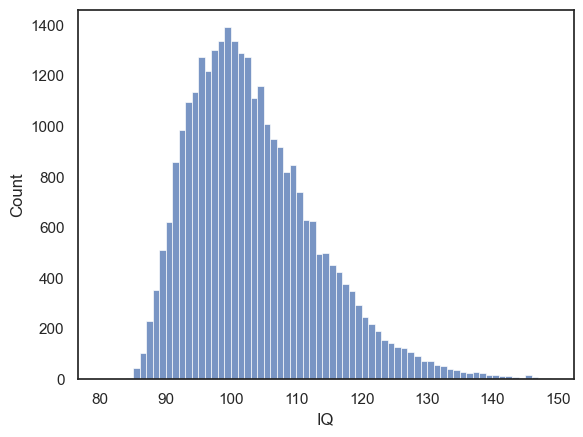

In [6]:
mathsIQ_30k = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/mathsIQ_30k.csv')
sns.histplot(mathsIQ_30k.IQ, bins=range(80,150))
plt.xlabel('IQ')
plt.show()

In [7]:
# Your code here to draw 10,000 samples of size 60 from the distribution above
# Obtain the sample mean from each sample
# Work out the proportion of sample means that are less than 100

nReps=10000
m=np.empty(nReps)
samplesize=60

for i in range(nReps):
    sample = mathsIQ_30k.sample(n=samplesize,replace=False)
    m[i]=sample.IQ.mean()

sum(m<100)/len(m)

np.float64(0.0053)

Hopefully the proportion of simulated sample means that are lower than 100 matches the prediction from the Central Limit Theorem - does it?

## Confidence intervals

The 95% confidence interval is the interval of the likelihood distribution that contains 95% of the area under the curve:


<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/sampling_CI95.png" width="80%"  />

Therefore, a 95% confidence interval is an interval around a sample mean with a width such that for a single 95% confidence interval computed on a single sample, we (the researcher) have 95% confidence that that interval contains $\mu$, the true mean of the parent population

Another way of thinking about this is that:

* if we drew many independent samples (all of size n) from the parent distribution
    * ... and we drew an interval of that width around each sample mean
    * ... then 95% of those intervals would contain the $\mu$, the true mean of the parent population

In the diagram below, I actually drew 100 samples of size 60 from my parent distribution (30,000 'maths students') and calculated the 95% confidence interval for $\mu$ from each sample, using the sample mean $m$ and sample deviation $s$.

* note that $m$ and $s$ are different in each of the 100 samples

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/sampling_CI95_2.png" width="80%"  />

You can see that the position and width of the 95% CIs varies from sample to sample

However, if I put the samples in order (from lowest sample mean to highest) you can see that indeed, the 95% CI does contain the true population mean $\mu$ in about 95/100 cases - actually 96/100 as this is ia random simulation 

* just a reminder that the population mean $\mu$ is the mean IQ *of A-level maths students*, **not** the general-population mean of 100)

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/sampling_CI95_3.png" width="80%"  />

### The magical $Z=1.96$ 

For a normally distributed variable:

* 95% of cases fall within 1.96 standard deviations of the mean
* 99% of cases fall within 2.33 standard deviations of the mean

For example, say women's heights in the UK follow a normal distribution $\mathcal{N}(164.3, 6.1)$

We expect 95% of women to have a height between $164.3 - 1.96 \times (6.1)$, and $164.3 + 1.96 \times (6.1)$, ie between 152.3 cm and 176.3 cm

* Remember the rule of thumb for the normal distribution:
  
<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/sampling_ruleofthumb.png" width="60%"  />

### 95% CI for maths IQ

The sampling distribution of the mean for the maths IQ data, with samples of size 60, was estimated to be $\mathcal{N}(m, \frac{s}{\sqrt{n}})$ = $\mathcal{N}(104.6, 1.47)$. 

Our 95% CI for the mean of the parent population (mean IQ of all maths A-level students) is then

$$[104.6 - 1.96 \times 1.47, 104.6 + 1.96 \times 1.47]$$

ie

$$[101.7,107.5]$$

That is, we are 95% confident that the true population mean IQ lies between 101.7 and 107.5.

Note that the mean of the general population (IQ=100) lies outside the 95% CI.